In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats

# 1. Load Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')

In [3]:
df.shape

(548, 7)

In [4]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


MarketID: unique identifier for market <br>
<br>MarketSize: size of market area by sales <br>
<br>LocationID: unique identifier for store location <br>
<br>AgeOfStore: age of store in years<br>
<br>Promotion: one of three promotions that was tested week: one of four weeks when the promotions were run<br>
<br>SalesInThousands: sales amount for specific LocationID, Promotion, and week

In [5]:
df['Promotion'].unique()

array([3, 2, 1])

# 2. Data Analysis

<font color=black size=5>*By analyzing how each promotion or test group is comprised, we could verify that the store profiles are similar to each other. This suggests that the sample groups are well controlled and the A/B testing results will be meaningful and trustworthy.*</font>

#### - Total Sales

In [6]:
df['SalesInThousands'].describe()

count    548.000000
mean      53.466204
std       16.755216
min       17.340000
25%       42.545000
50%       50.200000
75%       60.477500
max       99.650000
Name: SalesInThousands, dtype: float64

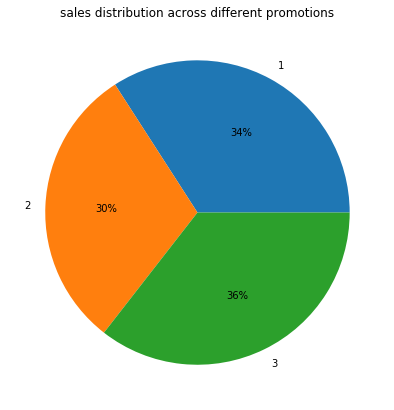

In [7]:
ax = df.groupby(
    'Promotion'
).sum()[
    'SalesInThousands'
].plot.pie(
    figsize=(7, 7),
    autopct='%1.0f%%'
)

ax.set_ylabel('')
ax.set_title('sales distribution across different promotions')

plt.show()

Promotion group 3 has the largest aggregate sales among the three groups.<br>
<br>However, each promotion group takes roughly about one third of the total sales during the promotion weeks. 

#### - Market Size

In [8]:
df.groupby('MarketSize').count()['MarketID']

MarketSize
Large     168
Medium    320
Small      60
Name: MarketID, dtype: int64

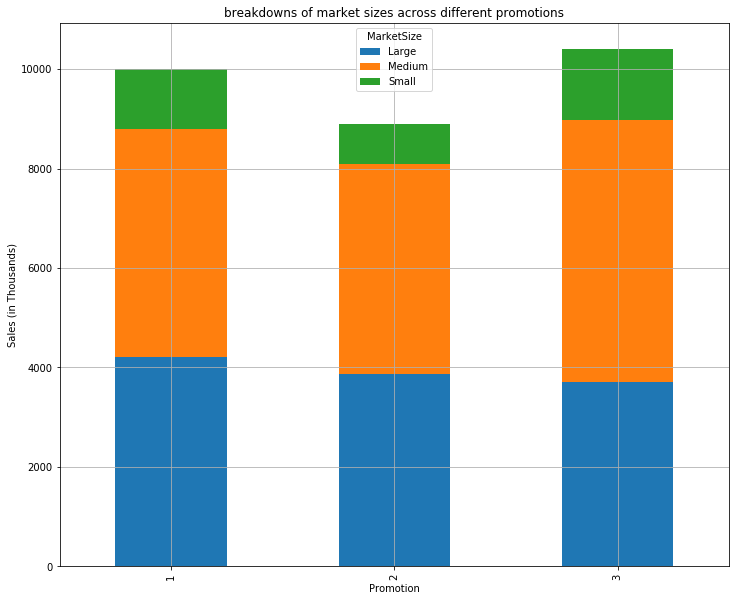

In [9]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).sum()[
    'SalesInThousands'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True #stack bar
)

ax.set_ylabel('Sales (in Thousands)')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

The medium market size occupies the most among all three promotion groups, while the small market size occupies the least.<br>
<br>We can verify that the compositions of different market sizes are similar among the three promotion groups

#### - Store Age

In [10]:
df['AgeOfStore'].describe()

count    548.000000
mean       8.503650
std        6.638345
min        1.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       28.000000
Name: AgeOfStore, dtype: float64

In [11]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


All three test groups seem to have similar store age profiles. The average ages of stores for the three groups are 8–9 years old and the majority of the stores are 10–12 years old or younger

#### - Week Number

In [13]:
df.groupby('week').count()['MarketID']

week
1    137
2    137
3    137
4    137
Name: MarketID, dtype: int64

In [15]:
df.groupby(['Promotion', 'week']).count()['MarketID']

Promotion  week
1          1       43
           2       43
           3       43
           4       43
2          1       47
           2       47
           3       47
           4       47
3          1       47
           2       47
           3       47
           4       47
Name: MarketID, dtype: int64

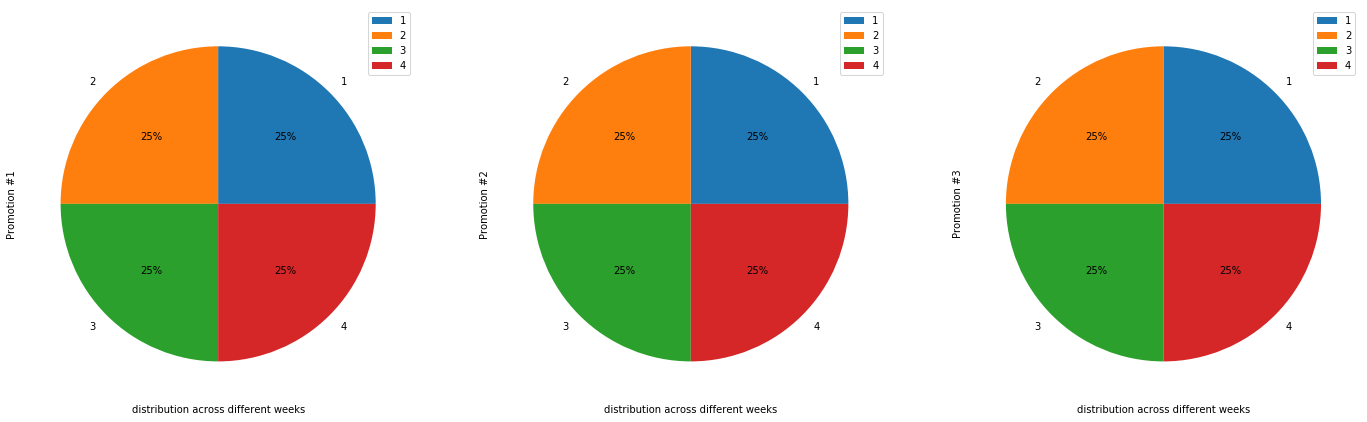

In [17]:
ax1, ax2, ax3 = df.groupby(
    ['week', 'Promotion']
).count()[
    'MarketID'
].unstack('Promotion').plot.pie(
    subplots=True,
    figsize=(24, 8),
    autopct='%1.0f%%'
)

ax1.set_ylabel('Promotion #1')
ax2.set_ylabel('Promotion #2')
ax3.set_ylabel('Promotion #3')

ax1.set_xlabel('distribution across different weeks')
ax2.set_xlabel('distribution across different weeks')
ax3.set_xlabel('distribution across different weeks')

plt.show()

The Week distribution among three groups is same

# 3. Statistical Significance

<font color=black size=5>*The null hypothesis is that the two groups show no statistically significant difference.<br>The alternate hypothesis states that the two groups show a statistically significant difference.*</font>

<font color=black size=5>*The larger the t-value is, the more difference there is between the two groups.<br>The smaller the p-value is, the more statistically significant difference.
<br>If the p- value is less than 0.05, the difference is highly unlikely to be by chance.<br>If the p- value is bigger than 0.05, the null hypothesis can't be rejected, which means two groups show no statistically significant difference.*</font>

#### - Promotion 1 vs. 2

In [18]:
means = df.groupby('Promotion').mean()['SalesInThousands']
means

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

#### - Promotion 1 vs. 2

In [19]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
    equal_var=False
)

In [20]:
t

6.42752867090748

In [21]:
p

4.2903687179871785e-10

The P-value is less than 0.05, these two groups are significantly different.<br>Promotion group 1 outperforms promotion group 2 because the average sale of promotion 1 is higher than promotion 2's.

#### - Promotion 1 vs. 3

In [22]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False
)

In [23]:
t

1.5560224307758634

In [24]:
p

0.12059147742229478

The P-value is bigger than 0.05, these two groups show no significantly difference.<br>The difference between promotion groups 1 and 3 is not statistically significant even if the average sale of promotion 1 is higher than promotion 3's.